# Import Packages

In [1]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from six import StringIO
import statsmodels.api as smApi
import matplotlib.colors as colors
import requests
from bs4 import BeautifulSoup as bs

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Collecting the data

In [2]:
page = requests.get("https://en.wikipedia.org/wiki/India_national_cricket_team")

soup = bs(page.content, "html.parser")

In [3]:
tbody = soup.find_all("tbody")[13]

tbody

<tbody><tr>
<th colspan="9"><a class="mw-redirect" href="/wiki/ICC_World_Twenty20" title="ICC World Twenty20">World Twenty20 record</a>
</th></tr>
<tr>
<th width="75">Year
</th>
<th width="150">Round
</th>
<th width="50">Position
</th>
<th width="50">GP
</th>
<th width="50">W
</th>
<th width="50">L
</th>
<th width="50">T
</th>
<th width="50">NR
</th>
<th width="50">Squad
</th></tr>
<tr style="background:gold;">
<td><span class="flagicon"><a href="/wiki/South_Africa" title="South Africa"><img alt="South Africa" class="thumbborder" data-file-height="267" data-file-width="400" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/23px-Flag_of_South_Africa.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/35px-Flag_of_South_Africa.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/45px-Flag_of_South_Africa.svg.png 2x" width="23"/></a></span> <a href="

In [4]:
tr = tbody.find_all("tr")

tr[2]

<tr style="background:gold;">
<td><span class="flagicon"><a href="/wiki/South_Africa" title="South Africa"><img alt="South Africa" class="thumbborder" data-file-height="267" data-file-width="400" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/23px-Flag_of_South_Africa.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/35px-Flag_of_South_Africa.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/45px-Flag_of_South_Africa.svg.png 2x" width="23"/></a></span> <a href="/wiki/2007_ICC_World_Twenty20" title="2007 ICC World Twenty20">2007</a></td>
<td><b><a href="/wiki/2007_ICC_World_Twenty20_Final" title="2007 ICC World Twenty20 Final">Champions</a></b></td>
<td><b>1/12</b></td>
<td><b>7</b></td>
<td><b>4</b></td>
<td><b>1</b></td>
<td><b>1</b></td>
<td><b>1</b></td>
<td><b><a href="/wiki/2007_ICC_World_Twenty20_squads#India" title="2007 ICC World T

In [5]:
players_name = list()

for i in range(2, len(tr)):
    if tr[i].find("td") != None:
        name = tr[i].find("td").find('a').text
        players_name.append(name)

players_name

AttributeError: ignored

In [ ]:
# collect information of players by using their names

# collect players id

players_id = [253802, 277916, 34102, 398438, 1070168, 1070173, 28235,
              642519, 290630, 32540, 452044, 26421, 234675, 719715, 290716, 
              625371, 714451, 422108, 931581, 425943, 279810, 625383, 700167, 481896, 940973, 447261, 
              802575, 326016, 475281, 236779, 376116, 430246, 559235]

In [ ]:
page1 = requests.get("https://www.espncricinfo.com/india/content/player/931581.html")

soup1 = bs(page1.content, "html.parser")

In [ ]:
tr = soup1.find_all("tr")

tr

In [ ]:
batting_tr = tr[1].find_all("td")

batting_tr

In [ ]:
heads_1 = ["player_id", "player_name", "matches", "innings", "not_outs", "runs", "highest_score", "batting_avg", "balls_faced", 
         "batting_strike_rate", "100s", "50s", "6s", "4s", "catches", "stumpings","balls_bowled", "wickets", "best_bowling_innings", 
         "best_bowling_matches", "bowling_avg", "economy", "bowling_strike_rate", "4w", "5w", "10w", "role"]

heads_2 = ["matches", "innings", "not_outs", "runs", "highest_score", "batting_avg", "balls_faced", 
         "batting_strike_rate", "100s", "50s", "6s", "4s", "catches", "stumpings","balls_bowled", "wickets", "best_bowling_innings", 
         "best_bowling_matches", "bowling_avg", "economy", "bowling_strike_rate", "4w", "5w", "10w"]

In [ ]:
datasets = dict()

for i in range(len(heads_1)):
    datasets[heads_1[i]] = []
    
# print(datasets)

for i in range(len(players_id)):
    page = requests.get(f"https://www.espncricinfo.com/india/content/player/{players_id[i]}.html")

    soup = bs(page.content, "html.parser")
    
    tr = soup.find_all("tr")
    
    batting_tr = tr[1].find_all("td")
    
    p_role = ""
    
    if not soup.find_all("p", class_="ciPlayerinformationtxt")[4].text.startswith("Playing"):
        p_role = soup.find_all("p", class_="ciPlayerinformationtxt")[5].find("span").text
    else:
        p_role = soup.find_all("p", class_="ciPlayerinformationtxt")[4].find("span").text
    
    datasets['player_id'].append(players_id[i])
    datasets['player_name'].append(players_name[i])
    
    data = []
    
    for j in range(1, len(batting_tr)):
        data.append(batting_tr[j].text)
    
    bownling_tr = tr[8].find_all("td")
    
    for j in range(1, len(bownling_tr)):
        if j != 1 and j != 2 and j != 4:
            data.append(bownling_tr[j].text)
            
    for k in range(len(heads_2)):
        datasets[heads_2[k]].append(data[k])
        
    datasets['role'].append(p_role)

# print(datasets)

for i in range(len(heads_2)):
    
    head = heads_2[i]
    
    # print(heads[i], datasets[heads[i]])
    
    for j in range(len(datasets[head])):
        val = datasets[head][j]
        
        try:
            val = int(val)
        except ValueError:
            try:
                val = val.replace("*", "").replace("-", "")
                if val == "":
                    val = 0
                else:
                    val = int(val)
            except ValueError:
                try:
                    val = float(val)
                    
                except ValueError:
                    num, denom = val.split("/")
                    val = float(num) / float(denom)
                    
        
        datasets[head][j] = val
        
print(datasets)

In [ ]:
# process the target(role) data into proper roles

for i in range(len(datasets['role'])):
    if "allrounder" in datasets['role'][i].lower():
        datasets['role'][i] = 'all_rounder'
    elif "wicketkeeper" in datasets['role'][i].lower():
        datasets['role'][i] = "wicket_keeper"
    elif "batsman" in datasets['role'][i].lower():
        datasets['role'][i] = "batsman"
    else:
        datasets['role'][i] = "bowler"

datasets['role']

In [ ]:
# convert dataset into pandas dataframe

dataframe = pd.DataFrame.from_dict(datasets)

# if we want to store locally uncomment the below 2 lines
# compression_opts = dict(method='zip', archive_name='cricket_players_dataset.csv')  
# dataframe.to_csv('cricket_players_dataset.zip', index=False, compression=compression_opts)

dataframe

# Process the data

In [ ]:
# read dataset.csv using pandas.read_csv function
# pandas.read_csv converts the dataset.csv into dataframe called Series Datatype

# data = pd.read_csv("cricket_players_dataset.csv")
# or 
data = dataframe.iloc[:, :]

In [ ]:
# head reads first 5 rows from dataframe

data.head()

,player_id,player_name,matches,innings,not_outs,runs,highest_score,batting_avg,balls_faced,batting_strike_rate,100s,50s,6s,4s,catches,stumpings,balls_bowled,wickets,best_bowling_innings,best_bowling_matches,bowling_avg,economy,bowling_strike_rate,4w,5w,10w,role
0,253802,Virat Kohli,89,151,10,7463,254,52.92,13046,57.20,27,25,836,22,87,0,175,0,0.000000,0.000000,0.0,2.88,0.0,0,0,0,batsman
1,277916,Ajinkya Rahane,71,121,12,4549,188,41.73,9134,49.80,12,23,509,32,90,0,0,0,0.000000,0.000000,0.0,0.00,0.0,0,0,0,batsman
2,34102,Rohit Sharma,36,61,7,2475,212,45.83,4213,58.74,7,11,253,58,39,0,383,2,0.038462,0.028571,112.0,3.50,191.5,0,0,0,batsman
3,398438,Mayank Agarwal,14,23,0,1052,243,45.73,1931,54.47,3,4,123,23,11,0,6,0,0.000000,0.000000,0.0,10.00,0.0,0,0,0,batsman
4,1070168,Prithvi Shaw,5,9,1,339,134,42.37,394,86.04,1,2,48,2,2,0,0,0,0.000000,0.000000,0.0,0.00,0.0,0,0,0,batsman


In [ ]:
# tails reads last 5 rows from dataframe

data.tail()

,player_id,player_name,matches,innings,not_outs,runs,highest_score,batting_avg,balls_faced,batting_strike_rate,100s,50s,6s,4s,catches,stumpings,balls_bowled,wickets,best_bowling_innings,best_bowling_matches,bowling_avg,economy,bowling_strike_rate,4w,5w,10w,role
28,475281,Shardul Thakur,2,3,1,73,67,36.50,130,56.15,0,1,9,2,2,0,268,7,0.065574,0.045161,23.42,3.67,38.2,1,0,0,bowler
29,236779,Ishant Sharma,99,133,44,736,57,8.26,2452,30.01,0,1,84,0,22,0,18420,302,0.094595,0.092593,32.22,3.16,60.9,10,11,1,bowler
30,376116,Umesh Yadav,48,55,23,359,31,11.21,719,49.93,0,0,35,17,17,0,7621,148,0.068182,0.075188,30.54,3.55,51.4,5,3,1,bowler
31,430246,Yuzvendra Chahal,54,10,4,53,18,8.83,90,58.88,0,0,7,0,15,0,1053,59,0.240000,0.240000,24.67,8.29,17.8,2,1,0,bowler
32,559235,Kuldeep Yadav,7,8,0,54,26,6.75,185,29.18,0,0,6,0,3,0,1063,26,0.087719,0.050420,23.84,3.49,40.8,2,2,0,bowler


In [ ]:
# now process the data for our model.
# we going to predict best team players from the best 33 players.
# each cricket team have 11 players.
# in our model we are going to choose best -> batsman - 5, bowlers - 3, all_rounders - 2, wicket_keepers - 1.

# we choose only particular datas from dataset for the better accuracy.
# we are going to fit the players by their previous skills, area of best performance.
# categorize the players by their performance.
# filter the best batsman by choosing -> batting_avg, runs
# filter the best bowlers by choosing -> bowling_avg, wickets
# filter the best all_rounders by choosing -> batting_avg, runs, bowling_avg, wickets, catches
# filter the best wicket_keeper by choosing -> stumpings, catches, batting_avg, runs
# finally the target we going to predict is role

# datasets are two types -> 
#     1. Discrete
#     2. Continous

# algorithms are mainly two forms,
#     1. Regression for Continous Variables
#     2. Classification for Discrete Variables. Like tree structure.

df_0 = data.loc[:, ['batting_avg', 'runs', 'bowling_avg', 'wickets', 'catches', 'stumpings', 'role']]

In [ ]:
df_0.head()

,batting_avg,runs,bowling_avg,wickets,catches,stumpings,role
0,52.92,7463,0.0,0,87,0,batsman
1,41.73,4549,0.0,0,90,0,batsman
2,45.83,2475,112.0,2,39,0,batsman
3,45.73,1052,0.0,0,11,0,batsman
4,42.37,339,0.0,0,2,0,batsman


In [ ]:
# process the datas from dataframe to all numbers
# if all datas is in number form, we can easily process the datas.

# the role is in string, convert them into labels like 0,1,2..etc.,

# now create a new dataframe

df = pd.DataFrame(data=df_0, columns=df_0.columns, index=df_0.index)

label_encoder = LabelEncoder()

df['target'] = label_encoder.fit_transform(df['role'])

In [ ]:
df.head()

,batting_avg,runs,bowling_avg,wickets,catches,stumpings,role,target
0,52.92,7463,0.0,0,87,0,batsman,1
1,41.73,4549,0.0,0,90,0,batsman,1
2,45.83,2475,112.0,2,39,0,batsman,1
3,45.73,1052,0.0,0,11,0,batsman,1
4,42.37,339,0.0,0,2,0,batsman,1


In [ ]:
df.drop('role', inplace=True, axis=1)

df.head()

,batting_avg,runs,bowling_avg,wickets,catches,stumpings,target
0,52.92,7463,0.0,0,87,0,1
1,41.73,4549,0.0,0,90,0,1
2,45.83,2475,112.0,2,39,0,1
3,45.73,1052,0.0,0,11,0,1
4,42.37,339,0.0,0,2,0,1


In [ ]:
# describe the dataframe

df.describe()

,batting_avg,runs,bowling_avg,wickets,catches,stumpings,target
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,28.305455,1224.333333,20.720606,47.545455,22.333333,0.515152,1.333333
std,16.673285,1778.149331,24.202010,95.342832,27.987348,2.078479,0.924211
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.210000,73.000000,0.000000,0.000000,3.000000,0.000000,1.000000
50%,32.840000,532.000000,23.420000,4.000000,8.000000,0.000000,1.000000
75%,42.090000,1389.000000,30.540000,26.000000,33.000000,0.000000,2.000000
max,56.330000,7463.000000,112.000000,394.000000,92.000000,11.000000,3.000000


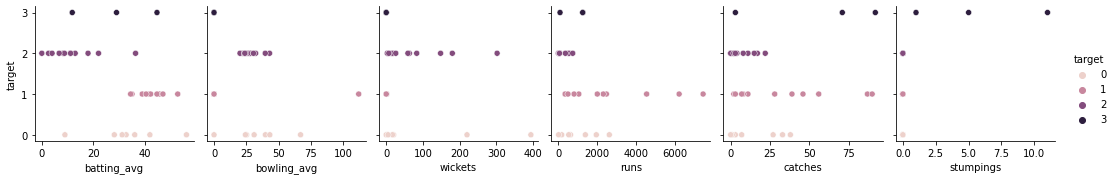

In [ ]:
# expolore dataframe with seaborn

sns.pairplot(df,x_vars=['batting_avg', 'bowling_avg', 'wickets', 'runs', 'catches', 'stumpings'], y_vars=['target'], hue='target')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


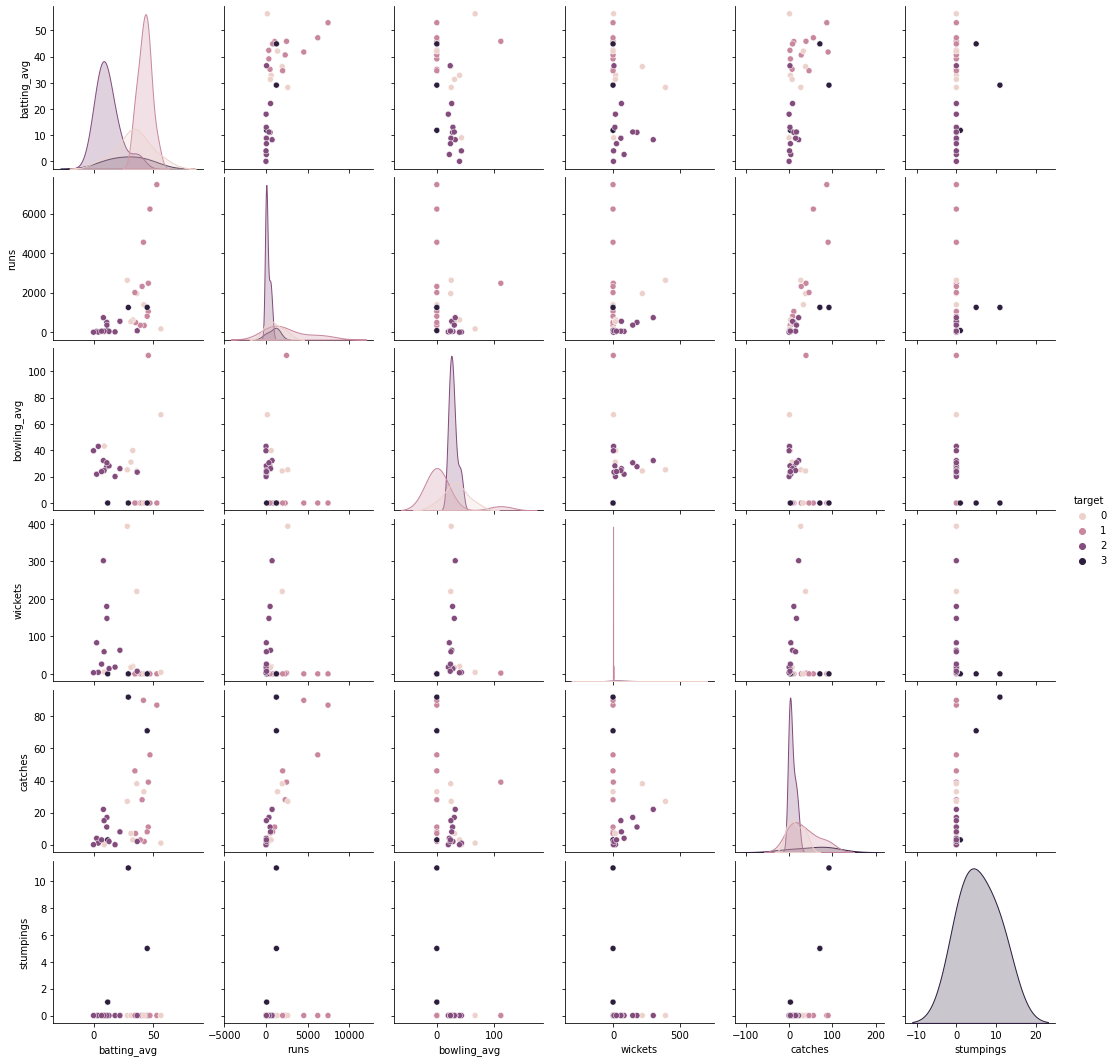

In [ ]:
sns.pairplot(df, hue='target')

In [ ]:
df.corr()

,batting_avg,runs,bowling_avg,wickets,catches,stumpings,target
batting_avg,1.000000,0.545359,-0.194207,-0.286054,0.448541,0.067538,-0.473385
runs,0.545359,1.000000,-0.234788,-0.003688,0.764028,-0.005831,-0.250201
bowling_avg,-0.194207,-0.234788,1.000000,0.145738,-0.298929,-0.218829,-0.163861
wickets,-0.286054,-0.003688,0.145738,1.000000,-0.032756,-0.127460,-0.097881
catches,0.448541,0.764028,-0.298929,-0.032756,1.000000,0.532015,0.075307
stumpings,0.067538,-0.005831,-0.218829,-0.127460,0.532015,1.000000,0.460925
target,-0.473385,-0.250201,-0.163861,-0.097881,0.075307,0.460925,1.000000


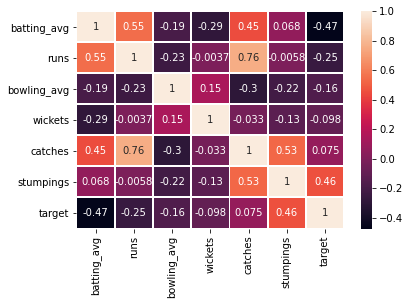

In [ ]:
sns.heatmap(df.corr(), annot=True, lw=1)

In [ ]:
# now split the dataframe as two variables named as X and Y
# X -> independent variable
# y -> dependent variable

X = df.loc[:, "batting_avg": "stumpings"]
y = df.loc[:, 'target']

In [ ]:
# now again split the X and y into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

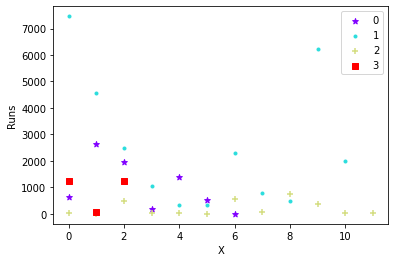

In [ ]:
# plot the datas one by one for see difference

markers = ['*', '.', '+', ',']

cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=y.min(), vmax=y.max())

for i in range(4):
    yy = X[y[:] == i]['runs']
    XX = np.arange(len(yy)).reshape((len(yy), 1))

    plt.scatter(XX, yy, color=cmap(norm(i)), marker=markers[i], label=i)
  
plt.xlabel('X')
plt.ylabel('Runs')
plt.legend()

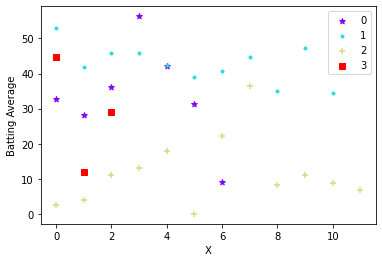

In [ ]:
for i in range(4):
    yy = X[y[:] == i]['batting_avg']
    XX = np.arange(len(yy)).reshape((len(yy), 1))

    plt.scatter(XX, yy, color=cmap(norm(i)), marker=markers[i], label=i)

plt.xlabel('X')
plt.ylabel('Batting Average')
plt.legend()

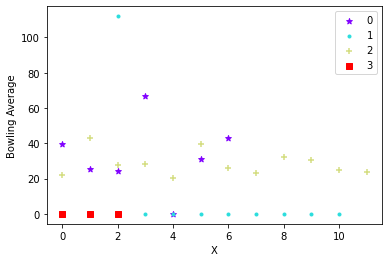

In [ ]:
for i in range(4):
    yy = X[y[:] == i]['bowling_avg']
    XX = np.arange(len(yy)).reshape((len(yy), 1))

    plt.scatter(XX, yy, color=cmap(norm(i)), marker=markers[i], label=i)

plt.xlabel('X')
plt.ylabel('Bowling Average')
plt.legend()

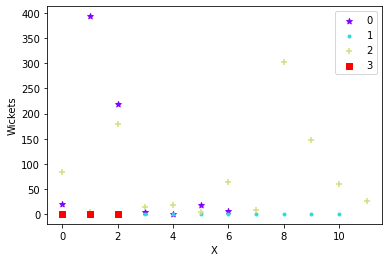

In [ ]:
for i in range(4):
    yy = X[y[:] == i]['wickets']
    XX = np.arange(len(yy)).reshape((len(yy), 1))

    plt.scatter(XX, yy, color=cmap(norm(i)), marker=markers[i], label=i)
  
plt.xlabel('X')
plt.ylabel('Wickets')
plt.legend()

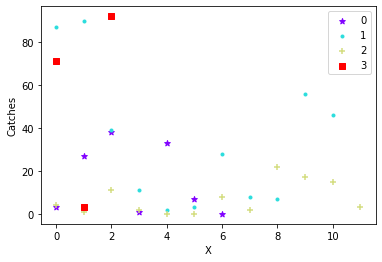

In [ ]:
for i in range(4):
    yy = X[y[:] == i]['catches']
    XX = np.arange(len(yy)).reshape((len(yy), 1))

    plt.scatter(XX, yy, color=cmap(norm(i)), marker=markers[i], label=i)
  
plt.xlabel('X')
plt.ylabel('Catches')
plt.legend()

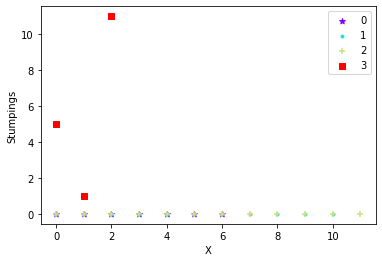

In [ ]:
for i in range(4):
    yy = X[y[:] == i]['stumpings']
    XX = np.arange(len(yy)).reshape((len(yy), 1))

    plt.scatter(XX, yy, color=cmap(norm(i)), marker=markers[i], label=i)

plt.xlabel('X')
plt.ylabel('Stumpings')
plt.legend()

# Linear Regression

In [ ]:
# Single Linear Regression

# Independent(X) variable have only one column and Dependent(y) variable have always one column
# Dependent(y) is the target variable

# SLR -> y = m0 + mx + c

# m = E(x-x_mean) * E(y-y_mean) / E(x-x_mean)^2

# c -> residual or random error

# c = y - mx

# Multiple Linear Regression

# Independent(X) variable have more than one column and Dependent(y) variable have always one column
# MLR -> y = m0 + m1xi1 + m2xi2 + m3xi3 + .... mpxip + c

# now we are using multiple linear regression

linear_model = LinearRegression()

In [ ]:
# fit the linear model

linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predict the linear model

y_linear_predict = linear_model.predict(X)
y_test_linear_predict = linear_model.predict(X_test)

In [ ]:
# get the score of the model

X_train_Sm = smApi.add_constant(X)

ls = smApi.OLS(y, X_train_Sm).fit()

print("\n\nLinear Regression R2 Score : ", r2_score(y, y_linear_predict), "\n\n")
print(ls.summary())

# R^2(Square) method useful to know accracy of the predicted model
# R^2 -> E(y_predicted - y_mean)^2 / E(y-y_mean)^2



Linear Regression R2 Score :  0.5316875583028133 


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     4.920
Date:                Wed, 17 Feb 2021   Prob (F-statistic):            0.00175
Time:                        05:26:32   Log-Likelihood:                -31.199
No. Observations:                  33   AIC:                             76.40
Df Residuals:                      26   BIC:                             86.87
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


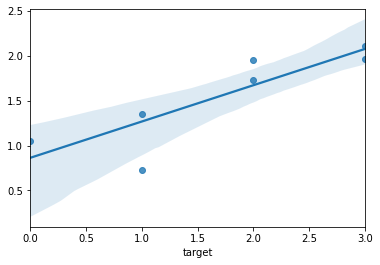

In [ ]:
# plotting the test and predicted datas

sns.regplot(y_test, y_test_linear_predict)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


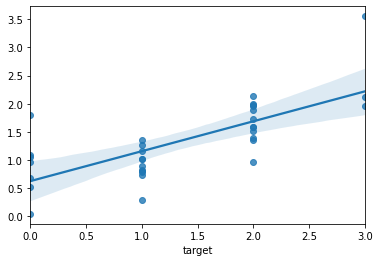

In [ ]:
sns.regplot(y, y_linear_predict)

In [ ]:
# split the dataset and again predict the data for only batsman

batsman_X_df = pd.DataFrame()

batsman_X_df['batting_avg'] = X['batting_avg']
batsman_X_df['runs'] = X['runs']

batsman_linear_model = LinearRegression()

batsman_linear_model.fit(batsman_X_df, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# now the predict the batsman model
y_batsman_linear_predict = batsman_linear_model.predict(batsman_X_df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


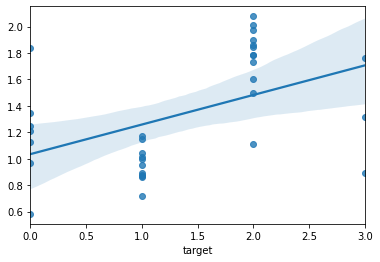

In [ ]:
# visualize the batsman model using seaborn

sns.regplot(y, y_batsman_linear_predict)

In [ ]:
# get the score of the batsman model

print("\n\nR2 Score : ", r2_score(y, y_batsman_linear_predict), "\n\n")



R2 Score :  0.22418332780079986 




# Decision Tree

In [ ]:
# all of our hyperplanes are axis-parallel

# Decision tree is a preceptron algorithm

# We fit the boundary for the datas

# Boundary a line by -> w1x1 + w1x2 + b = 0
# w1x1 + w1x2 + b = 0 -> Wx + b = 0; W = (w1, w2), x = (x1, x2); 
# W is a vector of w1, w2 & x is a vector of x1, x2

# now make the decision tree for the X and y
# use sklearn for quick analysis

# we are using criterion as gini and entropy for see the difference

dc_gini_model = DecisionTreeClassifier(criterion='gini', random_state=0)
dc_entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# fit the tree model
dc_gini_model.fit(X_train, y_train)
dc_entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# predict
y_dc_gini_predict = dc_gini_model.predict(X_test)
y_dc_entropy_predict = dc_entropy_model.predict(X_test)

In [ ]:
# evaluate our model
# use metrics such as confusion matrix, precision and recall

print("Decision Tree Accuracy : ", accuracy_score(y_test, y_dc_gini_predict), "\n\n")

# classitifcation_report
print(classification_report(y_test, y_dc_gini_predict))
print(classification_report(y_test, y_dc_entropy_predict))

# confusion_matrix
print(confusion_matrix(y_test, y_dc_gini_predict))
print(confusion_matrix(y_test, y_dc_entropy_predict))

Decision Tree Accuracy :  0.5714285714285714 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.40      1.00      0.57         2
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.57         7
   macro avg       0.35      0.50      0.39         7
weighted avg       0.40      0.57      0.45         7

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.40      1.00      0.57         2
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.57         7
   macro avg       0.35      0.50      0.39         7
weighted avg       0.40      0.57      0.45         7

[[0 1 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 2 0 0]]
[[0 1 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


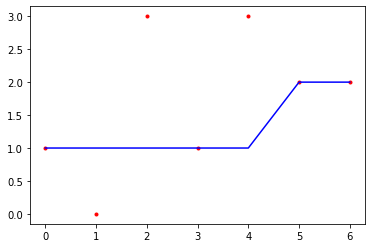

In [ ]:
# create dummy dataset X_test for plot the 2D graph

np_test = np.arange(len(y_test)).reshape((len(y_test), 1))

plt.scatter(np_test, y_test, color='red', marker='.')
plt.plot(np_test, y_dc_gini_predict, color='blue')

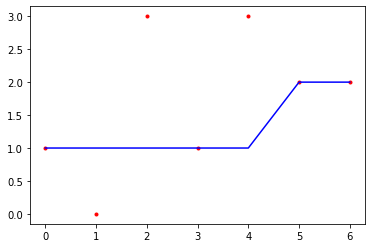

In [ ]:
plt.scatter(np_test, y_test, color='red', marker='.')
plt.plot(np_test, y_dc_entropy_predict, color='blue')

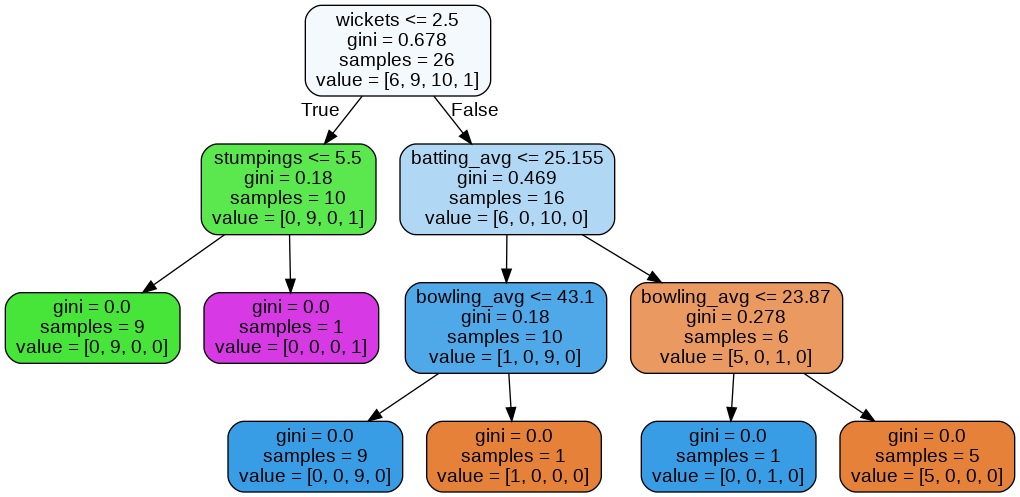

In [ ]:
# visualization of a tree

# for gini

filter_df = df.drop('target', axis=1)

features = list(filter_df.columns)

dot_data = StringIO()  

export_graphviz(dc_gini_model, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png())  

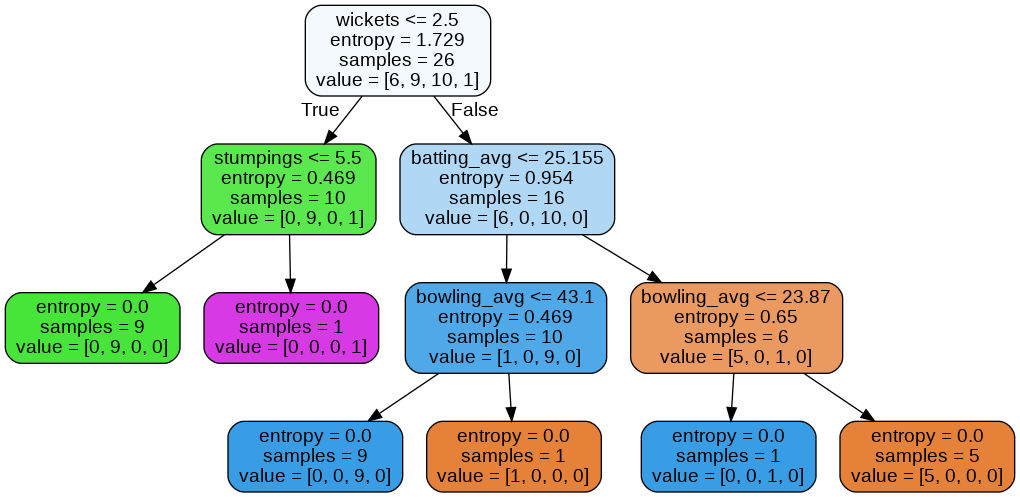

In [ ]:
# for entropy

filter_df = df.drop('target', axis=1)

features = list(filter_df.columns)

dot_data = StringIO()  

export_graphviz(dc_entropy_model, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png()) 

# SVM

In [ ]:
# Support Vector Machine

C = 1.0

linear_svc_model = SVC(kernel = 'linear', C=C, degree=3).fit(batsman_X_df, y)
poly_svc_model = SVC(kernel = "poly", degree=3, C=C).fit(batsman_X_df, y)

In [ ]:
y_linear_svc_predict = linear_svc_model.predict(batsman_X_df)
y_poly_svc_predict = poly_svc_model.predict(batsman_X_df)

In [ ]:
# get the score of the model

print("\n\nLinear SVM Accuracy : ", accuracy_score(y, y_linear_svc_predict), "\n")

# Linear Kernel
print("\nLinear Kernel--------------------------------------------->")
print(classification_report(y, y_linear_svc_predict))
print(confusion_matrix(y, y_linear_svc_predict))

# Polynomial Kernel
print("\nPolynomial Kernel----------------------------------------->")
print(classification_report(y, y_poly_svc_predict))
print(confusion_matrix(y, y_poly_svc_predict))



Linear SVM Accuracy :  0.7272727272727273 


Linear Kernel--------------------------------------------->
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.71      0.91      0.80        11
           2       0.85      0.92      0.88        12
           3       0.00      0.00      0.00         3

    accuracy                           0.73        33
   macro avg       0.52      0.56      0.54        33
weighted avg       0.65      0.73      0.68        33

[[ 3  3  1  0]
 [ 1 10  0  0]
 [ 1  0 11  0]
 [ 1  1  1  0]]

Polynomial Kernel----------------------------------------->
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.75      0.55      0.63        11
           2       0.48      1.00      0.65        12
           3       0.00      0.00      0.00         3

    accuracy                           0.55        33
   macro a

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# create dummy dataset X_test for plot the 2D graph

np_test = np.arange(len(y)).reshape((len(y), 1))

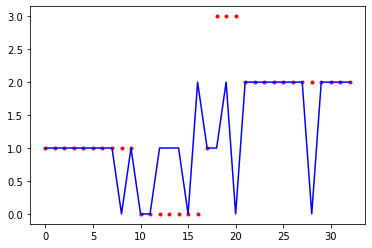

In [ ]:
# Linear Kernel
plt.scatter(np_test, y, color='red', marker='.')
plt.plot(np_test, y_linear_svc_predict, color='blue')

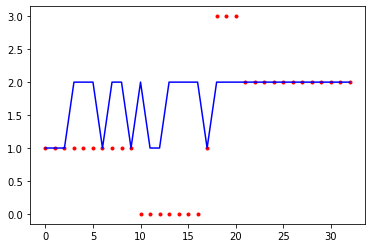

In [ ]:
# Polynomial Kernel
plt.scatter(np_test, y, color='red', marker='.')
plt.plot(np_test, y_poly_svc_predict, color='blue')

# Naive Bayes

In [ ]:
# Naive Bayes

# P(A|B) = P(B|A) * P(A) / P(B)

# P(A) -> Prior Proability
# P(A|B) -> Posterior Proability
 
# The above formula is only for the discrte variables.

# Typically, naive bayes classifier's don't have a problem with continuous input variables.
# essentially, there are different flavors of naive Bayes:
# - Multi-variate Bernoulli Naive Bayes for binary data.
# - Multinomial Naive Bayes for categorical data (a generalization of the Bernoulli Naive Bayes model).
# - Gaussian Naive Bayes for continuous features.

# Here we using the Gaussian Naive Bayes for continous variables.

# Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution.

# Gaussian Probability Density Function (PDF) -> (1/(sqrt(2*pi)*sd)) * exp(-((x-mean^2) / (2*sd^2))).

# Gaussian Naive Bayes

gaussian_naive_bayes_model = GaussianNB()

In [ ]:
# fit the data
gaussian_naive_bayes_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# predict the data
y_naive_bayes_predict = gaussian_naive_bayes_model.predict(X_test)

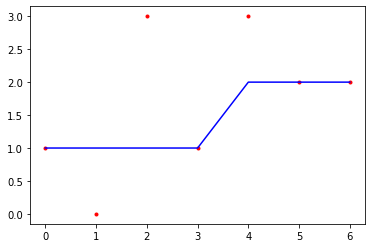

In [ ]:
np_test = np.arange(len(y_test)).reshape((len(y_test), 1))

plt.scatter(np_test, y_test, color='red', marker='.')
plt.plot(np_test, y_naive_bayes_predict, color='blue')

In [ ]:
print("\n\nNaive Bayes Accuracy : ", accuracy_score(y_test, y_naive_bayes_predict), "\n")

print(classification_report(y_test, y_naive_bayes_predict))
print(confusion_matrix(y_test, y_naive_bayes_predict))



Naive Bayes Accuracy :  0.5714285714285714 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         2
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         2

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.37         7
weighted avg       0.33      0.57      0.42         7

[[0 1 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 1 1 0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


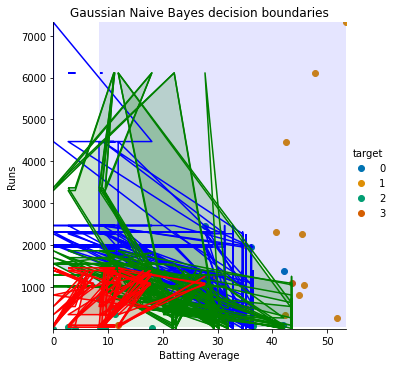

In [ ]:
# now splitting the datasets for the better accuracy

color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)

# plot the difference of batting_avg and bowling_avg
sub_plot = sns.FacetGrid(df, hue="target", height=5, palette = 'colorblind').map(plt.scatter, "batting_avg", "runs").add_legend()
ax = sub_plot.ax

# Computing the predicted class function for each value on the grid
# Splitting the dataset by their role

batsman_gaussian_nb_model = GaussianNB()

batsman_X_df = pd.DataFrame()

batsman_X_df['batting_avg'] = X['batting_avg']
batsman_X_df['runs'] = X['runs']

batting_avg_grid, runs_grid = np.meshgrid(np.array(batsman_X_df['batting_avg']), np.array(batsman_X_df['runs']))

batsman_gaussian_nb_model.fit(batsman_X_df, y)

batsman_zz = np.array([batsman_gaussian_nb_model.predict([[i, j]])[0] for i,j in zip(np.ravel(batting_avg_grid), np.ravel(runs_grid))] )

#Reshaping the predicted class into the meshgrid shape
Z = batsman_zz.reshape(batting_avg_grid.shape)

#Plot the filled and boundary contours
ax.contourf(batting_avg_grid, runs_grid, Z, 2, alpha = .1, colors = ('blue','green','red'))
ax.contour( batting_avg_grid, runs_grid, Z, 2, alpha = 1, colors = ('blue','green','red'))

ax.set_xlabel('Batting Average')
ax.set_ylabel('Runs')
ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

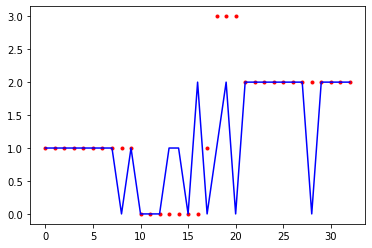

In [ ]:
batsman_y_naive_bayes_predict = batsman_gaussian_nb_model.predict(batsman_X_df)

np_test = np.arange(len(y)).reshape((len(y), 1))

plt.scatter(np_test, y, color='red', marker='.')
plt.plot(np_test, batsman_y_naive_bayes_predict, color='blue')

In [ ]:
print("Batsman Naive Bayes Accuracy : ", accuracy_score(y, batsman_y_naive_bayes_predict), "\n")

Batsman Naive Bayes Accuracy :  0.7272727272727273 



# Random Forest

In [ ]:
# now predict the batsman role wih Random Forest

# here we using random forest classifier not random forest regressor

batsman_random_forest_model = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=1)

In [ ]:
# fit the model with the batsman dataset and y
batsman_random_forest_model.fit(batsman_X_df, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# predict the batsman role
y_batsman_random_forest_predict = batsman_random_forest_model.predict(batsman_X_df)

In [ ]:
# now calculate the accuracy of actual and predicted data

print("\n\nBatsman Random Forest Accuracy : ", accuracy_score(y, y_batsman_random_forest_predict), '\n\n')

print(classification_report(y, y_batsman_random_forest_predict))
print(confusion_matrix(y, y_batsman_random_forest_predict))



Batsman Random Forest Accuracy :  0.6666666666666666 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.59      0.91      0.71        11
           2       0.75      1.00      0.86        12
           3       0.00      0.00      0.00         3

    accuracy                           0.67        33
   macro avg       0.33      0.48      0.39        33
weighted avg       0.47      0.67      0.55        33

[[ 0  5  2  0]
 [ 0 10  1  0]
 [ 0  0 12  0]
 [ 0  2  1  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


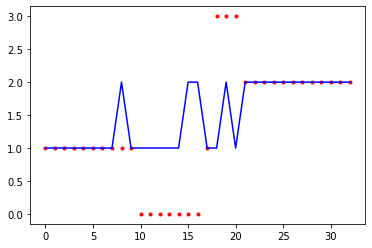

In [ ]:
# now plot the graph for the actual and predicted data

np_test = np.arange(len(y)).reshape((len(y), 1))

plt.scatter(np_test, y, color='red', marker='.')
plt.plot(np_test, y_random_forest_predict, color='blue')

In [ ]:
target_names = df_0['role']

target_names

0           batsman
1           batsman
2           batsman
3           batsman
4           batsman
5           batsman
6           batsman
7           batsman
8           batsman
9           batsman
10      all_rounder
11      all_rounder
12      all_rounder
13      all_rounder
14      all_rounder
15      all_rounder
16      all_rounder
17          batsman
18    wicket_keeper
19    wicket_keeper
20    wicket_keeper
21           bowler
22           bowler
23           bowler
24           bowler
25           bowler
26           bowler
27           bowler
28           bowler
29           bowler
30           bowler
31           bowler
32           bowler
Name: role, dtype: object

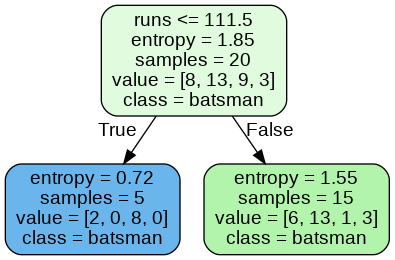

In [ ]:
# now plot the structure of the tree using randome forest model

features = list(batsman_X_df.columns)

target_names = df_0['role']

dot_data = StringIO()

estimator = batsman_random_forest_model.estimators_[5]

export_graphviz(estimator, out_file=dot_data, 
                feature_names= features,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png())

In [ ]:
# now predict for all roles

random_forest_model = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=1)

# train the model with the X and y
random_forest_model.fit(X, y)

# test the model
y_random_forest_predict = random_forest_model.predict(X)

In [ ]:
# now calculate the accuracy of actual and predicted data

print("\n\nRandom Forest Accuracy : ", accuracy_score(y, y_random_forest_predict), '\n\n')

print(classification_report(y, y_random_forest_predict))
print(confusion_matrix(y, y_random_forest_predict))



Random Forest Accuracy :  0.696969696969697 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      1.00      0.79        11
           2       0.75      1.00      0.86        12
           3       0.00      0.00      0.00         3

    accuracy                           0.70        33
   macro avg       0.35      0.50      0.41        33
weighted avg       0.49      0.70      0.57        33

[[ 0  3  4  0]
 [ 0 11  0  0]
 [ 0  0 12  0]
 [ 0  3  0  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
